Optimización de Monte Carlo
===

* 30:00 min | Última modificación: Mayo 21, 2021 | [YouTube]

## Definición del problema

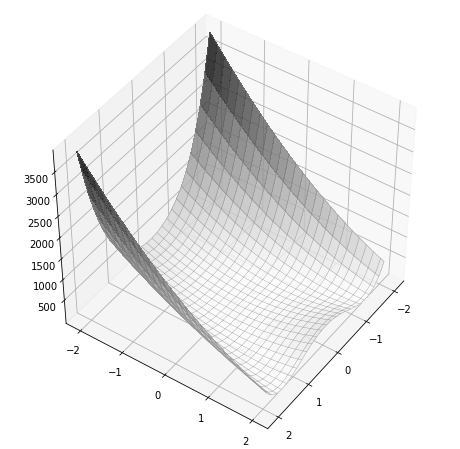

In [1]:
#
# Para ejemplificar su uso, buscará el punto de mínima de
# la función de Rosenbrock de dos dimensiones. El punto de
# mínima es f(1, 1) = 0. La región de búsqueda es
#
#    -2.048 < x, y < 2.048
#
# A continuación se gráfica la función y su contorno para
# el caso de 2 dimensiones.
#
from EOS.benchmarks import Rosenbrock 

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

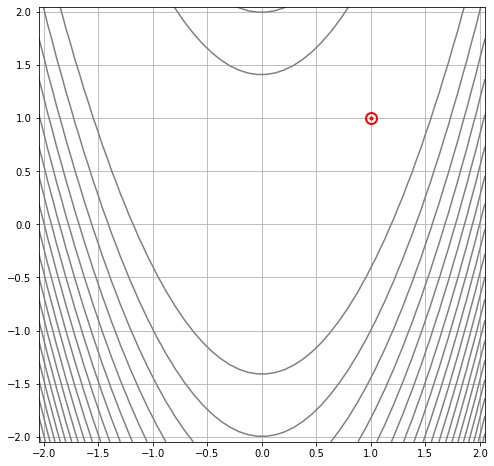

In [2]:
#
# El punto rojo indica el mínimo de la función
#
fn.plot_contour()

## Algoritmo

In [3]:
#
# Crea una función que genera soluciones uniformemente
# distribuidas en el hipercubo definido por los límites
# low y high
#
from EAOS.generators import RandomUniform

POPSIZE = 500

monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=fn.LB,
    high=fn.UB,
    seed = 123456,
)

#
# Genera una muestra aleatoria de 500 soluciones
#
solutions = monte_carlo()
solutions[:5]

[{'x': array([ 0.55916032, -0.47181142]), 'fn_x': None},
 {'x': array([-1.85366355,  1.86471522]), 'fn_x': None},
 {'x': array([ 1.66318464, -0.1762527 ]), 'fn_x': None},
 {'x': array([-0.89893488,  0.5576655 ]), 'fn_x': None},
 {'x': array([1.96899098, 1.2797206 ]), 'fn_x': None}]

In [4]:
#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
from EOS.fnevaluator import FnEvaluator

evaluator = FnEvaluator(fn)

#
# Evalua la muestra aleatoria
#
solutions = evaluator(solutions)
solutions[:5]

[{'x': array([ 0.55916032, -0.47181142]), 'fn_x': 61.733921834747115},
 {'x': array([-1.85366355,  1.86471522]), 'fn_x': 255.05853052990307},
 {'x': array([ 1.66318464, -0.1762527 ]), 'fn_x': 866.2326798368231},
 {'x': array([-0.89893488,  0.5576655 ]), 'fn_x': 9.87689230733496},
 {'x': array([1.96899098, 1.2797206 ]), 'fn_x': 675.4862719988924}]

In [5]:
#
# Ordena la muestra por el valor de la función objetivo
#
from EOS.operators import SelectionBest

select = SelectionBest(k=POPSIZE)
solutions = select(solutions)
solutions[:5]

[{'x': array([0.7672115 , 0.57737045]), 'fn_x': 0.06683107378195952},
 {'x': array([0.7970882 , 0.58614213]), 'fn_x': 0.28331072212685754},
 {'x': array([1.02338792, 0.99125291]), 'fn_x': 0.31493062592442145},
 {'x': array([1.34463207, 1.74876381]), 'fn_x': 0.4700834252368894},
 {'x': array([0.31481491, 0.12501742]), 'fn_x': 0.5366062129010523}]

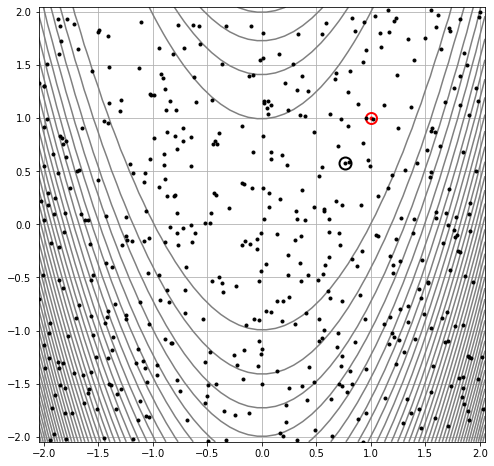

In [11]:
#
# Se grafican los puntos generados aleatoriamente sobre el
# contorno de la función.
#
import matplotlib.pyplot as plt


X = [s.x[0] for s in solutions]
Y = [s.x[1] for s in solutions]

fn.plot_contour(levels=40)
plt.gca().plot(X, Y, ".k")
plt.gca().plot(
    solutions[0].x[0],
    solutions[0].x[1],
    "o",
    c="k",
    fillstyle="none",
    markersize=12,
    markeredgewidth=2,
)
plt.show()

## Experimento 1

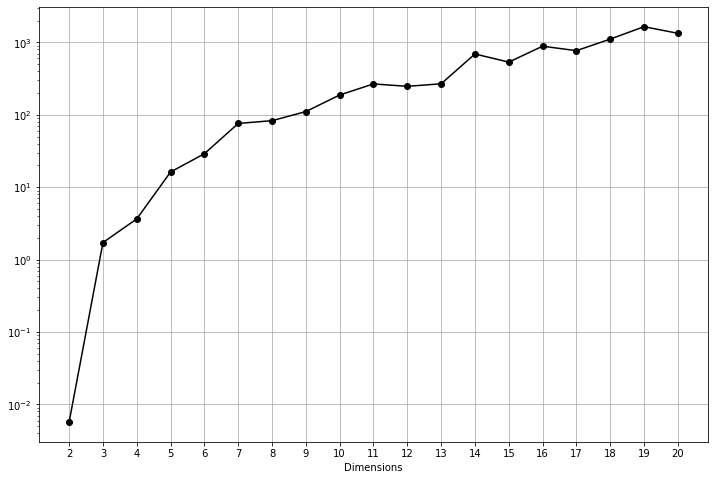

In [13]:
#
# En este se experimento se tomaran 10.000 puntos y se
# grafica el mejor punto encontrado contra la cantidad de
# dimensiones
#
import numpy as np

POPSIZE = 10000

select = SelectionBest(k=POPSIZE)

best_fn_x = []

for n_dim in range(2, 21):

    fn = Rosenbrock(n_dim=n_dim)
    
    monte_carlo = RandomUniform(
        pop_size=POPSIZE,
        low=fn.LB,
        high=fn.UB,
        seed = 123456,
    )
    solutions = monte_carlo()

    evaluator = FnEvaluator(fn)
    solutions = evaluator(solutions)
    
    solutions = select(solutions)
    
    best_fn_x.append(0.00000001 + solutions[0].fn_x)
            
plt.figure(figsize=(12,8))
plt.plot(list(range(2, 21)), best_fn_x, 'o-k')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(2, 21, 1))
plt.xlabel('Dimensions')
plt.show()

#
# La figura muestra como el valor del óptimo se degrada con
# la cantidad de dimensiones manteniendo la cantidad de 
# puntos evaluados fija. Este método no mejora en 
# comparación con la búsqueda exhaustiva ya que operan de
# forma similar.
# 

## Experimento 2

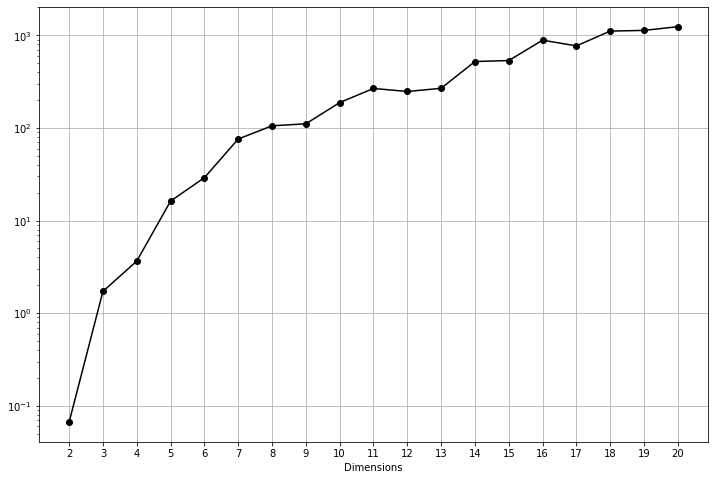

In [14]:
#
# En este experimento la cantidad de puntos evaluados será
# 1.000 * la cantidad de dimensiones del problema. Esto es,
# para 2 dimensiones se evaluarán 2.000 puntos, para 3 se 
# evaluarán 3.000 puntos y así sucesivamente
#

best_fn_x = []

for n_dim in range(2, 21):

    fn = Rosenbrock(n_dim=n_dim)
    
    monte_carlo = RandomUniform(
        pop_size=1000*n_dim,
        low=fn.LB,
        high=fn.UB,
        seed = 123456,
    )
    solutions = monte_carlo()

    evaluator = FnEvaluator(fn)
    solutions = evaluator(solutions)
    
    solutions = select(solutions)
    
    best_fn_x.append(0.00000001 + solutions[0].fn_x)
            
plt.figure(figsize=(12,8))
plt.plot(list(range(2, 21)), best_fn_x, 'o-k')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(2, 21, 1))
plt.xlabel('Dimensions')
plt.show()

#
# La figura muestra como el valor del óptimo se degrada con
# la cantidad de dimensiones manteniendo la cantidad de 
# puntos evaluados fija. Aunque la cantidad de puntos 
# evaluados aumenta con la cantidad de dimensiones, no se
# percibe una mejora, en comparación con la gráfica 
# anterior
# 